# LeNet-5

- Input 32*32*1
- 6 filters 5*5 s=1 no padding , reduces to 28 28 6
- Apply pooling (average)f=2,s=2 end up with 14 14 6
- 16 filters 5 5 s=1 , 10 10 16 
- Another pooling layer f=2 s=2 5 5 16 
- Fully connected layers with 120 neurons layer 
- Another layer with 84 neurons 
- Connect to final output

[LaCun et all 1998 Gradient-based learning applied to document recognition]

### notes
- People used tanh and sigmoid non-linearity 
- Complexity in computations because of crazy ways to speed up under existed possibilities
- Graph transformer network is not used today
- Focus on section 2 and section 3 quick look

<img src="https://lh4.googleusercontent.com/VzSMrD9HQOHUB6LYLtjy2JQswtrdPMAc3ZK1Z1dUD_JPrv-1JHirJ6fyOgKtGW-8nxb8MckiblOhk0mM3UUXMyy-tv9ZBSgDPOXTPlO7Fp70N7ajZmZQAlrc3bqPtXKNywSSe6j3"/>

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Details of the "Happy" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

## 2 - Building a model in Keras

In [3]:
def Lenet5Model(input_shape):
    """
    Implementation of the Lenet5.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    X_input = Input(input_shape)
    ######### 1st Layer #######
    X = Conv2D(6, (5, 5), strides = (1, 1), name = 'conv1')(X_input)
    X = Activation('relu')(X)
    X = AveragePooling2D((2, 2),(2,2), name='avg_pool1')(X)
    ######## 2nd layer #########
    X = Conv2D(16, (5, 5), strides = (1, 1), name = 'conv2')(X)
    X = Activation('relu')(X)
    X = AveragePooling2D((2, 2),(2,2), name='avg_pool2')(X)
    ######## Fully connected layers ###########
    X = Flatten()(X)
    X = Dense(120, activation='tanh', name='fc1')(X)
    X = Dense(84, activation='tanh', name='fc2')(X)
    X = Dense(1, activation='sigmoid', name='output')(X)

    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    return model

In [4]:
lenet5Model = Lenet5Model((64,64,3))
lenet5Model.compile(optimizer="Adam",loss="binary_crossentropy", metrics = ["accuracy"])

In [5]:
lenet5Model.fit(x=X_train,y=Y_train,epochs=50,batch_size=32)

Epoch 1/50
600/600 [==============================] - 3s 5ms/step - loss: 0.7187 - acc: 0.5183
Epoch 2/50
600/600 [==============================] - 3s 5ms/step - loss: 0.6052 - acc: 0.6950
Epoch 3/50
600/600 [==============================] - 3s 5ms/step - loss: 0.3838 - acc: 0.8167
Epoch 4/50
600/600 [==============================] - 3s 5ms/step - loss: 0.2491 - acc: 0.9067
Epoch 5/50
600/600 [==============================] - 3s 5ms/step - loss: 0.1986 - acc: 0.9067
Epoch 6/50
600/600 [==============================] - 3s 5ms/step - loss: 0.1816 - acc: 0.9400
Epoch 7/50
600/600 [==============================] - 3s 5ms/step - loss: 0.1278 - acc: 0.9517
Epoch 8/50
600/600 [==============================] - 3s 5ms/step - loss: 0.1147 - acc: 0.9567
Epoch 9/50
600/600 [==============================] - 3s 5ms/step - loss: 0.0980 - acc: 0.9633
Epoch 10/50
600/600 [==============================] - 3s 5ms/step - loss: 0.0800 - acc: 0.9817
Epoch 11/50
600/600 [============================

In [7]:
preds = lenet5Model.evaluate(x=X_test,y=Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 0s 3ms/step
()
Loss = 0.16767642711599667
Test Accuracy = 0.9533333333333334


[[0.9999999]]


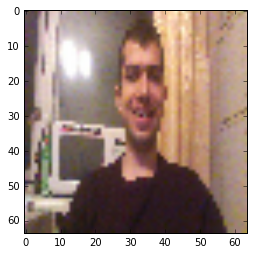

In [8]:
img_path = './images/my-img.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(lenet5Model.predict(x))

In [9]:
lenet5Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 60, 60, 6)         456       
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 6)         0         
_________________________________________________________________
avg_pool1 (AveragePooling2D) (None, 30, 30, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 26, 26, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
avg_pool2 (AveragePooling2D) (None, 13, 13, 16)        0         
__________

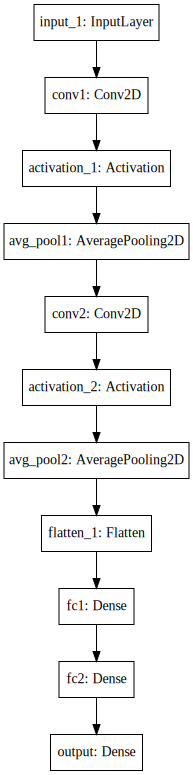

In [10]:
plot_model(lenet5Model, to_file='output/lanet5.png')
SVG(model_to_dot(lenet5Model).create(prog='dot', format='svg'))